Proyecto 1


In [3]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import datetime, os
from scipy.stats import norm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from math import sqrt
from math import exp
from math import pi
import sklearn.metrics as sm
import joblib
from sklearn.utils import resample



In [4]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#2. Get the file
downloaded = drive.CreateFile({'id':"10dl3yzGKvcFPAdB8pfj3xgZ7XyB6l79_"})   # replace the id with id of file you want to access
downloaded.GetContentFile('data_titanic_proyecto.csv')
downloaded

GoogleDriveFile({'id': '10dl3yzGKvcFPAdB8pfj3xgZ7XyB6l79_', 'kind': 'drive#file', 'etag': '"MTYyNTE4MDIxMTU2NQ"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/10dl3yzGKvcFPAdB8pfj3xgZ7XyB6l79_', 'webContentLink': 'https://drive.google.com/uc?id=10dl3yzGKvcFPAdB8pfj3xgZ7XyB6l79_&export=download', 'alternateLink': 'https://drive.google.com/file/d/10dl3yzGKvcFPAdB8pfj3xgZ7XyB6l79_/view?usp=drivesdk', 'embedLink': 'https://drive.google.com/file/d/10dl3yzGKvcFPAdB8pfj3xgZ7XyB6l79_/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/text/csv', 'title': 'data_titanic_proyecto.csv', 'mimeType': 'text/csv', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2021-07-01T22:55:39.216Z', 'modifiedDate': '2021-07-01T22:56:51.565Z', 'modifiedByMeDate': '2021-07-01T22:56:51.565Z', 'lastViewedByMeDate': '2021-07-01T22:55:39.216Z', 'markedViewedByMeDa

In [5]:
titanic_data = pd.read_csv('data_titanic_proyecto.csv')
titanic_data.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,F,Y
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,M,N


In [6]:
titanic_data.dtypes

PassengerId             int64
Name                   object
Age                   float64
SibSp                   int64
Parch                   int64
Ticket                 object
Fare                  float64
Cabin                  object
Embarked               object
passenger_class        object
passenger_sex          object
passenger_survived     object
dtype: object

In [7]:
titanic_data.isna().sum()/len(titanic_data)

PassengerId           0.000000
Name                  0.000000
Age                   0.198653
SibSp                 0.000000
Parch                 0.000000
Ticket                0.000000
Fare                  0.000000
Cabin                 0.771044
Embarked              0.002245
passenger_class       0.000000
passenger_sex         0.000000
passenger_survived    0.000000
dtype: float64

Podemos observar una cantidad mayor a 5% de Na en algunas columnas, por la cantidad de datos procedemos a imputar. 


In [8]:
#1 drop columns,
titanic_data.dropna(axis = 1, how = 'any', inplace = True)


In [9]:
titanic_data.isna().sum()/len(titanic_data)

PassengerId           0.0
Name                  0.0
SibSp                 0.0
Parch                 0.0
Ticket                0.0
Fare                  0.0
passenger_class       0.0
passenger_sex         0.0
passenger_survived    0.0
dtype: float64

In [10]:
titanic_data.head()

,PassengerId,Name,SibSp,Parch,Ticket,Fare,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,Lower,F,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,Upper,F,Y
4,5,"Allen, Mr. William Henry",0,0,373450,8.0500,Lower,M,N


Contamos con dos variables categoricas las cuales se usaran para la predicion passeger_sex y Passenger_class, se procede a hacer OHE y OrdinaryEncoding


In [11]:
enc = OrdinalEncoder()

In [12]:
titanic_data.passenger_class.unique()
X = np.expand_dims(np.sort(titanic_data.passenger_class.unique()), axis = 1)
X
enc.fit(X)

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [13]:
titanic_data['passenger_class'] = enc.transform(titanic_data[['passenger_class']])
titanic_data.head()

,PassengerId,Name,SibSp,Parch,Ticket,Fare,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,0.0,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,2.0,F,Y
2,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,0.0,F,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,2.0,F,Y
4,5,"Allen, Mr. William Henry",0,0,373450,8.0500,0.0,M,N


In [14]:
titanic_data.passenger_sex.unique()

array(['M', 'F'], dtype=object)

Passenger_sex contiene dos categorias M o F, esta se puede escribir como es hombre si o no. 
**texto en negrita**

In [15]:
titanic_data['passenger_sex'] = np.where(titanic_data['passenger_sex'] == 'M', 1, 0)

In [16]:
titanic_data.head()

,PassengerId,Name,SibSp,Parch,Ticket,Fare,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,0.0,1,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,2.0,0,Y
2,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,0.0,0,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,2.0,0,Y
4,5,"Allen, Mr. William Henry",0,0,373450,8.0500,0.0,1,N


La variable a predecir tambien tambien puede ser convertida a un valor binario  ya que cuenta con categorias Y o N, esta se puede escribir.


In [17]:
titanic_data['passenger_survived'] = np.where(titanic_data['passenger_survived'] == 'Y', 1, 0)

In [18]:
titanic_data.head()

,PassengerId,Name,SibSp,Parch,Ticket,Fare,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,0.0,1,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,2.0,0,1
2,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,0.0,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,2.0,0,1
4,5,"Allen, Mr. William Henry",0,0,373450,8.0500,0.0,1,0


In [19]:
titanic_data.columns

Index(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'passenger_class', 'passenger_sex', 'passenger_survived'],
      dtype='object')

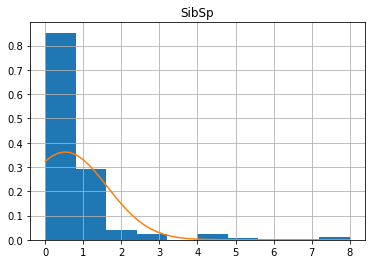

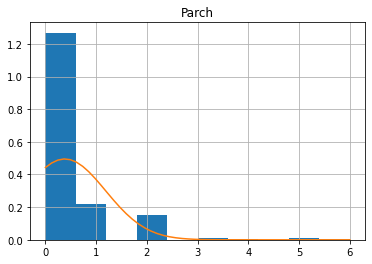

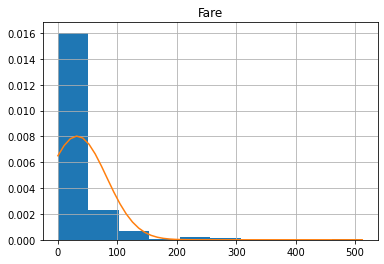

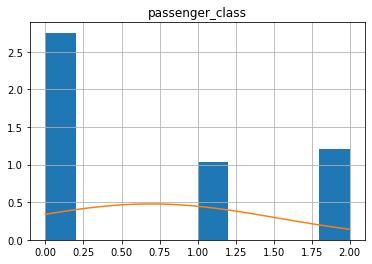

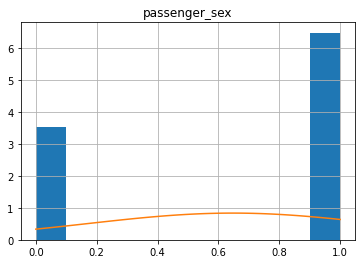

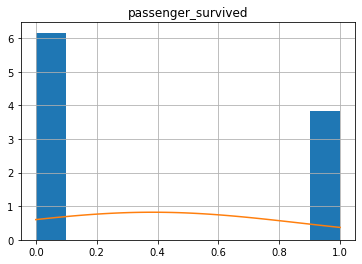

In [20]:
X = titanic_data
for col in ['SibSp', 'Parch', 'Fare',
       'passenger_class', 'passenger_sex', 'passenger_survived']:
    X.loc[:, col].hist(density = True)
    norm_fit = norm.fit(X.loc[:, col])
    norm_dist_fitted = norm(*norm_fit)
    plt.title(col)

    X_range = X.loc[:, col].min(),X.loc[:, col].max()
    X_values =  np.linspace(*X_range)
    plt.plot(X_values,norm_dist_fitted.pdf(X_values))
    plt.show()

Eliminar columnas especificas que no aportan al modelo.


In [21]:
titanic_data.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
titanic_data.head()

,SibSp,Parch,Fare,passenger_class,passenger_sex,passenger_survived
0,1,0,7.2500,0.0,1,0
1,1,0,71.2833,2.0,0,1
2,0,0,7.9250,0.0,0,1
3,1,0,53.1000,2.0,0,1
4,0,0,8.0500,0.0,1,0


Separar datos en train y test

In [22]:
X_train, X_valid = train_test_split(titanic_data, test_size = 0.40, random_state = 45)

In [23]:
X_valid.head()

,SibSp,Parch,Fare,passenger_class,passenger_sex,passenger_survived
248,1,1,52.5542,2.0,1,1
197,0,1,8.4042,0.0,1,0
133,1,0,26.0000,1.0,0,1
169,0,0,56.4958,0.0,1,0
736,1,3,34.3750,0.0,0,0


In [24]:
X_valid, X_test, y_valid, y_test  = train_test_split(X_valid.iloc[:, :-1], X_valid[['passenger_survived']],test_size = 0.50, random_state = 46)

In [25]:
X_test.head()

,SibSp,Parch,Fare,passenger_class,passenger_sex
858,0,3,19.2583,0.0,0
11,0,0,26.5500,2.0,0
682,0,0,9.2250,0.0,1
206,1,0,15.8500,0.0,1
604,0,0,26.5500,2.0,1


In [26]:
#X_train, X_test, y_train, y_test = train_test_split(titanic_data.iloc[:, :-1], titanic_data[['passenger_survived']], test_size = 0.25, random_state = 42)
y_train = X_train[['passenger_survived']]
X_train = X_train.iloc[:, :-1]
X_train.head()

,SibSp,Parch,Fare,passenger_class,passenger_sex
138,0,0,9.2167,0.0,1
22,0,0,8.0292,0.0,0
353,1,0,17.8000,0.0,1
673,0,0,13.0000,1.0,1
273,0,1,29.7000,2.0,1


In [73]:
X_train.head()

,SibSp,Parch,Fare,passenger_class,passenger_sex
298,0,0,30.5000,2.0,1
884,0,0,7.0500,0.0,1
247,0,2,14.5000,1.0,0
478,0,0,7.5208,0.0,1
305,1,2,151.5500,2.0,1


In [74]:
y_train.head()

,passenger_survived
298,1
884,0
247,1
478,0
305,1


In [27]:
print(titanic_data.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_valid.shape)
print(y_valid.shape)


(891, 6)
(534, 5)
(534, 1)
(179, 5)
(179, 1)
(178, 5)
(178, 1)


Modelos :

In [28]:
def decisionTree(x, y, criterion = 'gini', splitter = 'best', max_depth = None, min_samples_split = 2):
    
    # Desicion trees
    model_dt = DecisionTreeClassifier(criterion = criterion, splitter = splitter, max_depth = max_depth, min_samples_split = min_samples_split)
    model_dt = model_dt.fit(x, y)

    columns = '_'.join(list(x.columns))
    log_str = 'decisionTree_criterion=' + criterion + '_splitter=' + splitter + '_max_depth={}'.format(max_depth) + '_min_samples_split={}'.format(min_samples_split) + columns
      
    joblib.dump(model_dt, log_str + '.joblib')
    return model_dt, log_str
    

In [253]:
model_dt, log_str = decisionTree(X_train, y_train)

In [255]:
joblib.load(log_str + '.joblib', mmap_mode=None)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
def SVM(x, y, c = 1, kernel = 'rbf', degree = 3):
    
    model_svc = SVC(C = c, kernel = kernel, degree = degree)
    model_svc = model_svc.fit(x.values, np.squeeze(y.values, axis = 1))

    columns = '_'.join(list(x.columns))
    log_str = 'SVM_c={}'.format(c) + '_kernel=' + kernel + '_degree={}'.format(degree) + columns
      
    joblib.dump(model_svc, log_str + '.joblib')
    return model_svc, log_str

In [134]:

# Naive Bayes Algorithm
def summarize_dataset(data):
  summaries = data.groupby('passenger_survived', as_index = True).agg(['mean', 'std'])
  y_probs = data['passenger_survived'].value_counts(normalize = True).to_frame(name = 'class')
  y_probs.columns = pd.MultiIndex.from_product([y_probs.columns, ['y_prob']])
  model = summaries.merge(y_probs, left_index = True, right_index = True)
  return model

def naive_bayes(x,y,n):
  data = x.merge(y, left_index = True, right_index = True)
  model_nb = summarize_dataset(data)

  columns = '_'.join(list(x.columns))
  log_str = 'naivebayes_n={}'.format(n) + columns
  model_nb.to_csv(log_str + '.csv')
  return model_nb, log_str

In [31]:


# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent

def bayes_prob(row, model):
  y_probs = model.iloc[:,-1]
  summaries = model.iloc[:,:-1]
  probabilities = dict()
  for class_y, y_prob in y_probs.items():
    probabilities[class_y] = y_prob
    for index, value in row.items():
      stdev = summaries.loc[class_y, (index,'std')]
      mean = summaries.loc[class_y, (index,'mean')]
      probabilities[class_y] *= calculate_probability(row[index], mean, stdev)
  return max(probabilities, key = probabilities.get)

def naive_bayes_predict(model, X):
  y_hat = X.apply(lambda row: bayes_prob(row, model), axis = 1)
  return y_hat

In [259]:
### test bayes
model, log_str = naive_bayes(X_train,y_train)
model



SibSp            ... passenger_sex     class
                        mean       std  ...           std    y_prob
passenger_survived                      ...                        
0                   0.548896  1.305408  ...      0.352769  0.593633
1                   0.488479  0.758352  ...      0.475146  0.406367

[2 rows x 11 columns]

In [210]:
X_valid
y_pred = naive_bayes_predict(model, X_valid)
data = X_valid.merge(y_valid, left_index = True, right_index = True)
data.merge(y_pred.to_frame(name = 'y_pred'), left_index = True, right_index = True)


,SibSp,Parch,Fare,passenger_class,passenger_sex,passenger_survived,y_pred
506,0,2,26.0000,1.0,0,1,1
834,0,0,8.3000,0.0,1,0,0
775,0,0,7.7500,0.0,1,0,0
102,0,1,77.2875,2.0,1,0,1
666,0,0,13.0000,1.0,1,0,0
...,...,...,...,...,...,...,...
550,0,2,110.8833,2.0,1,1,1
404,0,0,8.6625,0.0,0,0,1
246,0,0,7.7750,0.0,0,0,1
588,0,0,8.0500,0.0,1,0,0


In [223]:
print(accuracy_score(y_valid, y_pred), '%')

0.7921348314606742 %


In [32]:
def model_log(log_str,mtype, y, y_hat):
    log_metrics = dict()
    log_metrics['model'] = log_str
    log_metrics['accuracy'] = sm.accuracy_score(y, y_hat)
    log_metrics['precision'] = sm.precision_score(y, y_hat)
    log_metrics['recall'] = sm.recall_score(y, y_hat)
    log_metrics['f1-score'] = sm.f1_score(y, y_hat)
    log_metrics['model_type'] = mtype
    df = pd.DataFrame(data = log_metrics, index = [0])
    df.to_csv('results.csv', mode = 'a', header = False, index = False)
    print('save metrics')
    return df

In [241]:
model_log('holamundo', y_valid, y_pred)

save metrics


In [242]:
results = pd.read_csv('results.csv')
results.head()

,holamundo,0.7921348314606742,0.6923076923076923,0.7258064516129032,0.7086614173228347
0,holamundo,0.792135,0.692308,0.725806,0.708661
1,holamundo,0.792135,0.692308,0.725806,0.708661


### **Sampleo bootstrap**


In [39]:
X_train_m1, y_train_m1 = resample(X_train, y_train, n_samples = 400)

model_dt1, log_str1 = decisionTree(X_train_m1, y_train_m1, criterion = 'gini', splitter = 'random', max_depth = None, min_samples_split =3)
y_hat = model_dt1.predict(X_valid)
stats = model_log(log_str1,'decisionTree', y_valid, y_hat)
print(y_hat)
stats.head()

save metrics
[1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1
 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0]


,model,accuracy,precision,recall,f1-score,model_type
0,decisionTree_criterion=gini_splitter=random_ma...,0.775281,0.711538,0.596774,0.649123,decisionTree


**SVM**

In [62]:
X_train_m2, y_train_m2 = resample(X_train, y_train, n_samples = 400)

model_svm1, log_str2 = SVM(X_train_m2, y_train_m2, c = 2, kernel = 'sigmoid', degree = 2)
y_hat = model_svm1.predict(X_valid)
stats = model_log(log_str2,'SVM', y_valid, y_hat)
print(y_hat)
stats.head()

save metrics
[1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0
 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1
 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1
 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1]


,model,accuracy,precision,recall,f1-score,model_type
0,SVM_c=2_kernel=sigmoid_degree=2SibSp_Parch_Far...,0.578652,0.415584,0.516129,0.460432,SVM


**Naive Bayes**

In [142]:
X_train_m3, y_train_m3 = resample(X_train, y_train, n_samples = 700)

model_nb1, log_str2 = naive_bayes(X_train,y_train,n=7)
y_hat = naive_bayes_predict(model_nb1, X_valid)

stats = model_log(log_str2,'naivebayes', y_valid, y_hat)

print(y_hat)
stats.head()

save metrics
506    1
834    0
775    0
102    1
666    0
      ..
550    1
404    1
246    1
588    0
622    0
Length: 178, dtype: int64


,model,accuracy,precision,recall,f1-score,model_type
0,naivebayes_n=7SibSp_Parch_Fare_passenger_class...,0.792135,0.692308,0.725806,0.708661,naivebayes


In [143]:
results = pd.read_csv('results.csv',names=['model','accuracy','precision','recall','f1-score','model_type'])
results

,model,accuracy,precision,recall,f1-score,model_type
0,decisionTree_criterion=gini_splitter=random_ma...,0.758427,0.626667,0.758065,0.686131,decisionTree
1,decisionTree_criterion=gini_splitter=random_ma...,0.769663,0.647887,0.741935,0.691729,decisionTree
2,decisionTree_criterion=entropy_splitter=random...,0.786517,0.700000,0.677419,0.688525,decisionTree
3,decisionTree_criterion=entropy_splitter=random...,0.724719,0.591549,0.677419,0.631579,decisionTree
4,decisionTree_criterion=entropy_splitter=random...,0.792135,0.676056,0.774194,0.721805,decisionTree
...,...,...,...,...,...,...
57,naivebayes_n=2SibSp_Parch_Fare_passenger_class...,0.780899,0.688525,0.677419,0.682927,naivebayes
58,naivebayes_n=3SibSp_Parch_Fare_passenger_class...,0.780899,0.694915,0.661290,0.677686,naivebayes
59,naivebayes_n=4SibSp_Parch_Fare_passenger_class...,0.780899,0.676923,0.709677,0.692913,naivebayes
60,naivebayes_n=5SibSp_Parch_Fare_passenger_class...,0.786517,0.687500,0.709677,0.698413,naivebayes


In [135]:
#data_tmp = results.loc[results["model_type"] != 'naivebayes']
#data_tmp.to_csv('results.csv', mode = 'w', header = False, index = False)

**Mejores modelos**

In [144]:
df = results.loc[results.groupby(['model_type'])['accuracy'].idxmax()]
df

,model,accuracy,precision,recall,f1-score,model_type
11,SVM_c=2_kernel=linear_degree=4SibSp_Parch_Fare...,0.786517,0.693548,0.693548,0.693548,SVM
4,decisionTree_criterion=entropy_splitter=random...,0.792135,0.676056,0.774194,0.721805,decisionTree
61,naivebayes_n=7SibSp_Parch_Fare_passenger_class...,0.792135,0.692308,0.725806,0.708661,naivebayes


**Predicciones**

In [149]:
### get top models
prediciones = dict()
for id, row in df.iterrows():
  if row['model_type'] == 'decisionTree' or row['model_type'] == 'SVM':
    model_predit = joblib.load( row['model'] + '.joblib', mmap_mode=None)
    prediciones[row['model_type']] = model_predit.predict(X_test)
   # print(prediciones)
    #print(model_predit)
  elif row['model_type'] == 'naivebayes':
    model_fin = pd.read_csv(row['model'] + '.csv', index_col = [0],  header = [0,1])
    prediciones[row['model_type']] = naive_bayes_predict(model_fin, X_test).values
    #print(model)
#print(prediciones)

28
SVM_c=2_kernel=linear_degree=4SibSp_Parch_Fare_passenger_class_passenger_sex
SVM
28
decisionTree_criterion=entropy_splitter=random_max_depth=None_min_samples_split=3SibSp_Parch_Fare_passenger_class_passenger_sex
decisionTree
28
naivebayes_n=7SibSp_Parch_Fare_passenger_class_passenger_sex
naivebayes
{'SVM': array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0]), 'decisionTree': array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0

In [190]:
df_pred = pd.DataFrame(data = prediciones)
df_pred.head()
print(len(prediciones['SVM']))
#np.mod(df_pred, axis=1)
from scipy import stats as st
moda=st.mode(df_pred, axis=1)
moda.mode
ensamble_predict = df_pred.merge(pd.DataFrame(moda.mode,columns=['moda']), left_index = True, right_index = True)
ensamble_predict.head()

179


,SVM,decisionTree,naivebayes,moda
0,1,1,1,1
1,1,1,1,1
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [180]:
 #X_valid.iloc[:, :-1]
 ensamble_predict.iloc[: , -1]

0      1
1      1
2      0
3      0
4      0
      ..
174    1
175    0
176    1
177    0
178    0
Name: 0, Length: 179, dtype: int64

In [191]:

log_metrics = dict()
log_metrics['accuracy'] = sm.accuracy_score(y_valid, ensamble_predict.iloc[: , -1])
log_metrics['precision'] = sm.precision_score(y_valid, ensamble_predict.iloc[: , -1])
log_metrics['recall'] = sm.recall_score(y_valid, ensamble_predict.iloc[: , -1])
log_metrics['f1-score'] = sm.f1_score(y_valid, ensamble_predict.iloc[: , -1])
log_metrics['model_type'] = mtype
ensamble_metrics = pd.DataFrame(data = log_metrics, index = [0])
  

ValueError: ignored

**Conclusiones**



*   La utilizacion de recursos como sklearn simplifican en gran medida la construcciones de model.
* La vitacora sin duda ayuda en gran medida a analizar el performance de un modelo y su seleccion. 
* Como forma personal la parte de tensorflow ya no me dio tiempo realizarlo como se queria.
* El analisis del modelo por medio de accuracy, presition, etc nos da una forma facil de medir el renidmiento de los modelos. 

